In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data= pd.read_csv("/content/drive/MyDrive/netflix1.csv")

In [3]:
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [57]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres,year_added,month_added,duration_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries],2021,9,90.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ...",2021,9,1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]",2021,9,1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]",2021,9,91.0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M...",2021,9,125.0


In [15]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [14]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [11]:
data.duplicated().sum()

0

In [12]:
data.fillna({'director':'Unknown','cast': 'Unknown','country':'Unknown'}, inplace=True)

In [13]:
data['date_added']= pd.to_datetime(data['date_added'])

In [8]:
data.type

,type
0,Movie
1,TV Show
2,TV Show
3,Movie
4,Movie
...,...
8785,TV Show
8786,TV Show
8787,TV Show
8788,TV Show


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [10]:
data.describe()

,date_added,release_year
count,8790,8790.000000
mean,2019-05-17 21:44:01.638225408,2014.183163
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-06 00:00:00,2013.000000
50%,2019-07-03 00:00:00,2017.000000
75%,2020-08-19 18:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.825466


In [16]:
type_counts= data['type'].value_counts()
type_counts

,count
type,
Movie,6126
TV Show,2664


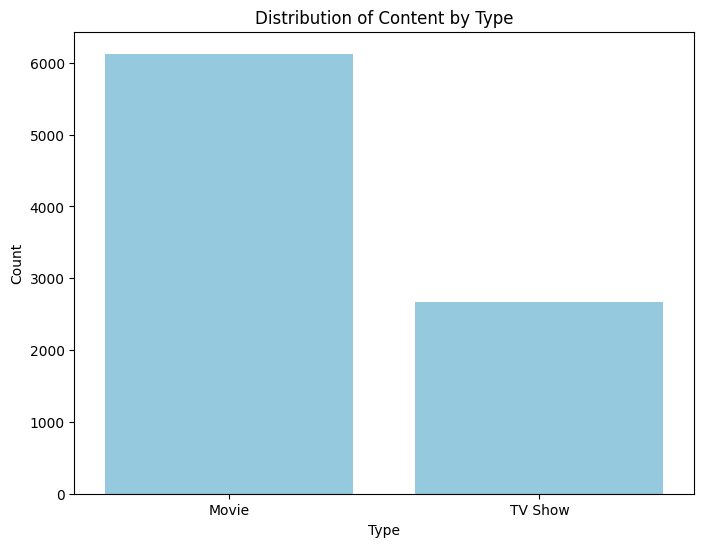

In [22]:
#plot the distribution
plt.figure(figsize=(8,6))
sns.barplot(x=type_counts.index, y=type_counts.values,color= 'skyblue')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [18]:
ratings_count= data['rating'].value_counts()
ratings_count

,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


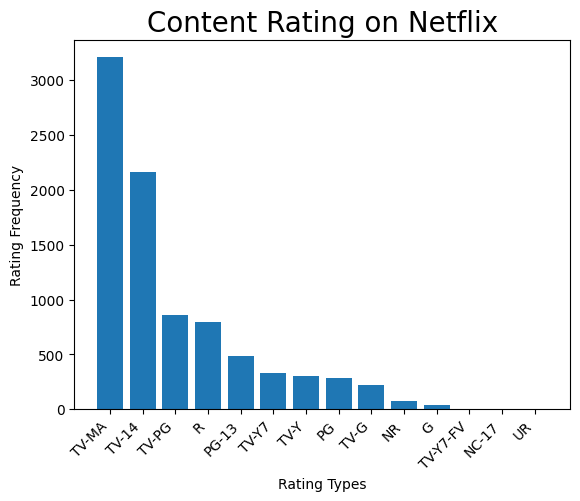

In [21]:
ratings=data['rating'].value_counts().reset_index().sort_values(by='count',ascending=False)
plt.bar(ratings['rating'],ratings['count'])
plt.xticks(rotation=45,ha='right')
plt.xlabel("Rating Types")
plt.ylabel("Rating Frequency")
plt.title("Content Rating on Netflix",fontsize=20)
plt.show()

In [44]:
yearly_counts = data['year_added'] = data['date_added'].dt.year
yearly_counts

,date_added
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8785,2017
8786,2018
8787,2016
8788,2018


In [45]:
yearly_counts = data['year_added'].value_counts().sort_index()
yearly_counts

,count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,426


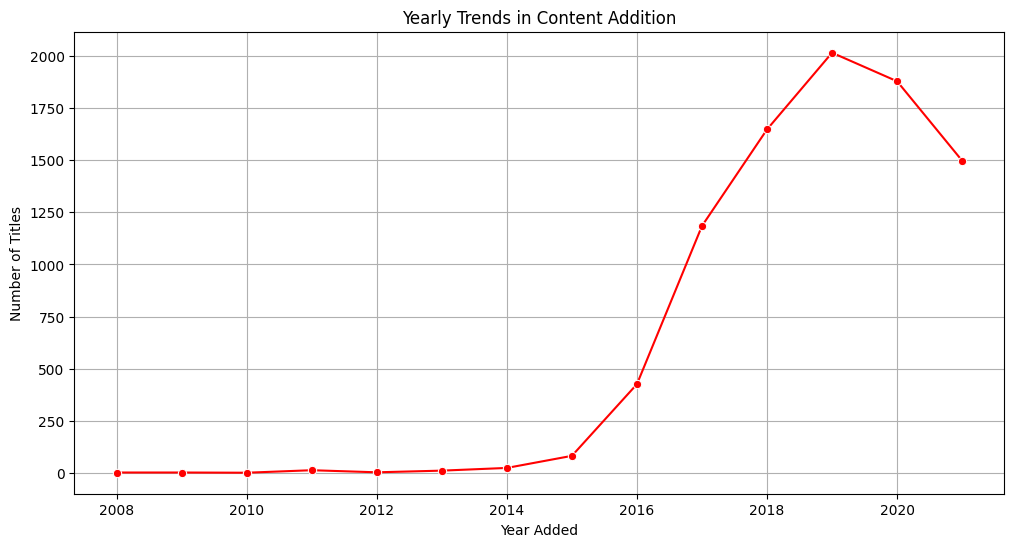

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values,marker='o',color='red')
plt.title('Yearly Trends in Content Addition')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [23]:
data['genres']=data['listed_in'].apply(lambda x: x.split(','))
genre_counts=pd.Series(sum(data['genres'], [])).value_counts().head(10)
genre_counts

,count
International Movies,2624
Dramas,1599
Comedies,1210
Action & Adventure,859
Documentaries,829
Dramas,827
International TV Shows,773
Independent Movies,736
TV Dramas,695
Romantic Movies,613


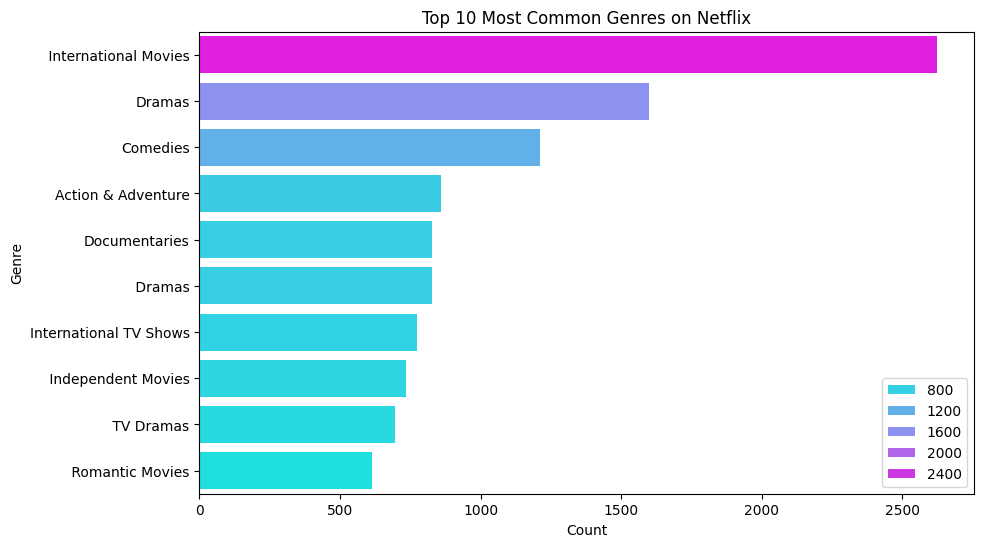

In [24]:
# Plot the 10 most common genres
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.values,palette='cool')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [25]:
top_countries=data['country'].value_counts().head(10)
top_countries

,count
country,
United States,3240
India,1057
United Kingdom,638
Pakistan,421
Not Given,287
Canada,271
Japan,259
South Korea,214
France,213


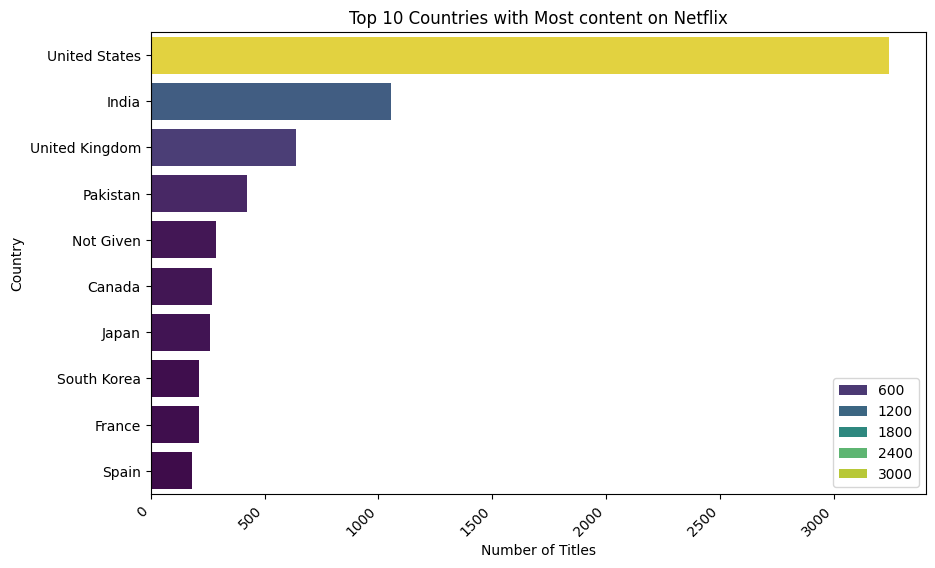

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.values,palette='viridis')
plt.xticks(rotation=45,ha='right')
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries with Most content on Netflix")
plt.show()

In [49]:
data['month_added'] = data['date_added'].dt.month
monthly_count = data['month_added'].value_counts().sort_index()
monthly_count

,count
month_added,
1,737
2,562
3,741
4,763
5,632
6,728
7,827
8,754
9,769


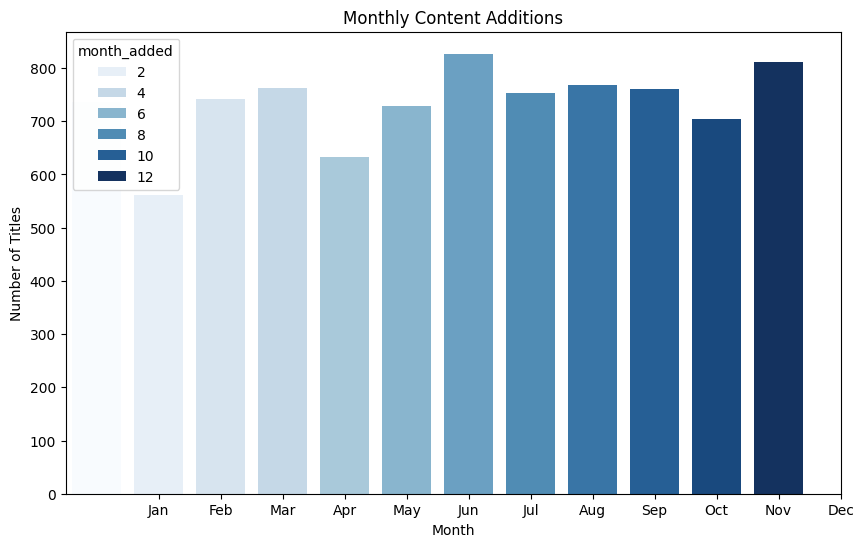

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_count.index, y=monthly_count.values,hue=monthly_count.index,palette='Blues')
plt.title('Monthly Content Additions')
plt.xlabel('Month')
plt.ylabel('Number of Titles')
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [29]:
# Count titles by director
top_directors = data['director'].value_counts().head(10)
top_directors

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12


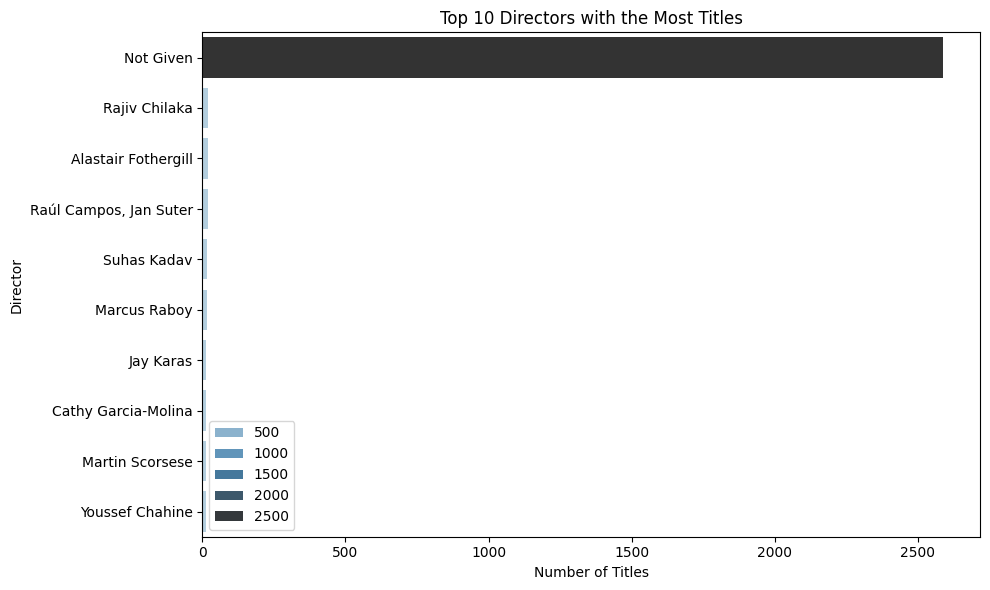

In [33]:
# plot top 10 directors
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.values,palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

In [35]:
# Generate word cloud
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

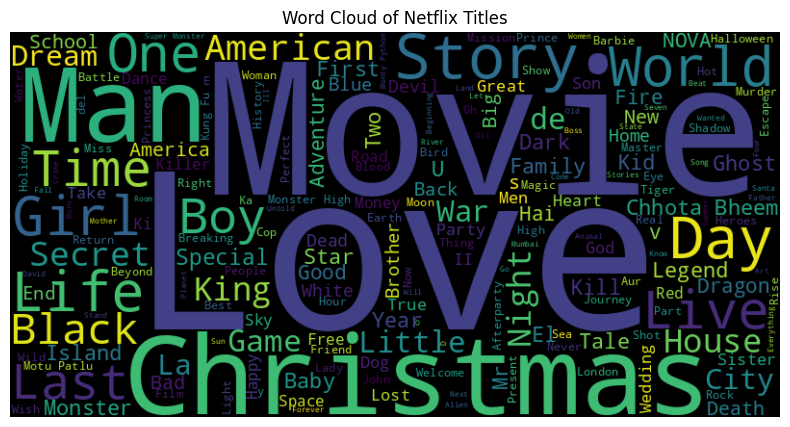

In [36]:
# plot word cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

In [52]:
Duration = data['duration_num'] = data['duration'].str.extract('(\d+)').astype(float)
Duration

,0
0,90.0
1,1.0
2,1.0
3,91.0
4,125.0
...,...
8785,2.0
8786,3.0
8787,1.0
8788,1.0


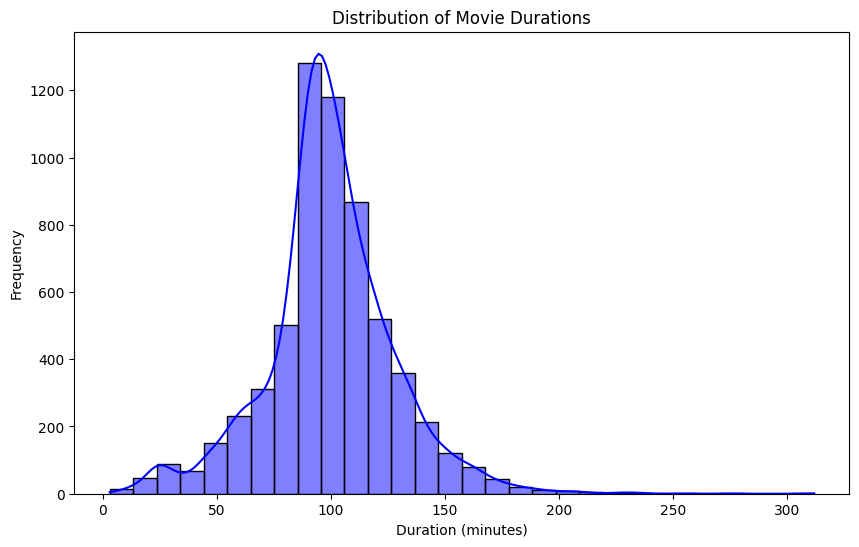

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['type'] == 'Movie']['duration_num'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [54]:
titles_per_year = data.groupby('release_year').size()
titles_per_year

,0
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1030
2018,1146
2019,1030


In [55]:
top_10_years = titles_per_year.sort_values(ascending=False).head(10)
top_10_years

,0
release_year,
2018,1146
2019,1030
2017,1030
2020,953
2016,901
2021,592
2015,555
2014,352
2013,286


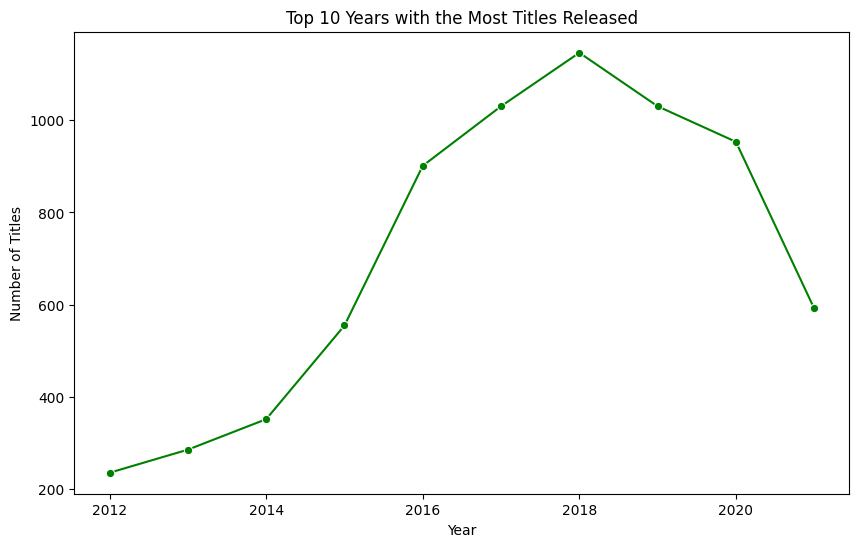

In [56]:
plt.figure(figsize=(10,6))
sns.lineplot(x=top_10_years.index, y=top_10_years.values, marker='o',color='green')
plt.title('Top 10 Years with the Most Titles Released')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [40]:
# Extract year and month from 'date_added'
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

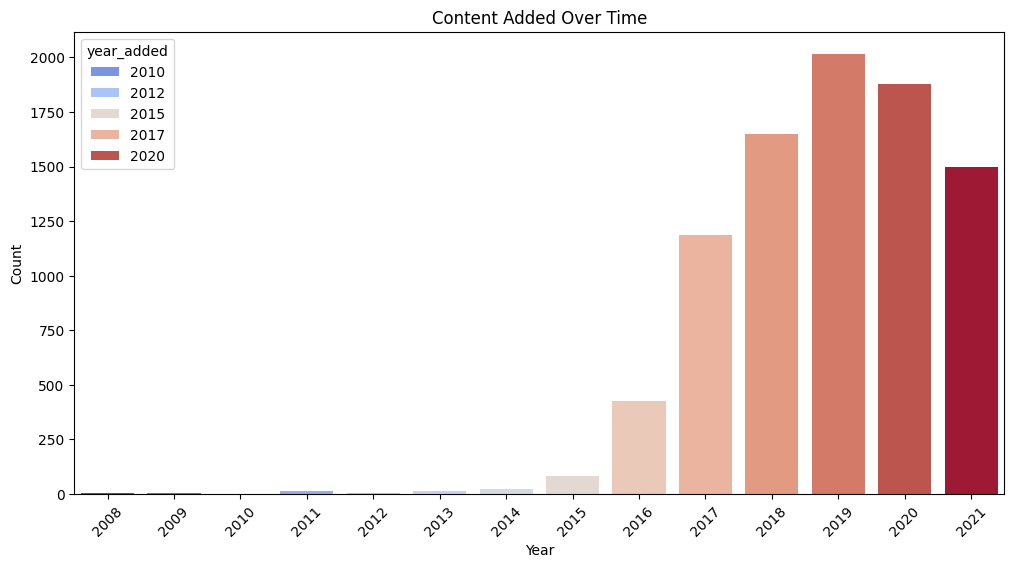

In [43]:
# Plot content added over the years
plt.figure(figsize=(12,6))
sns.countplot(x='year_added', data=data, hue='year_added', palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Total Content on Netflix')

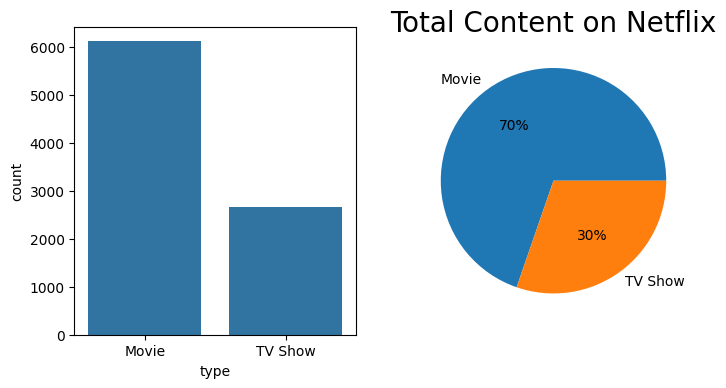

In [58]:
freq=data['type'].value_counts()
fig,axes=plt.subplots(1,2,figsize=(8,4))
sns.countplot(data,x=data['type'],ax=axes[0])
plt.pie(freq,labels= ['Movie','TV Show'], autopct='%.0f%%')
plt.title('Total Content on Netflix',fontsize=20)

Text(0.5, 0.98, 'Rating on Netflix')

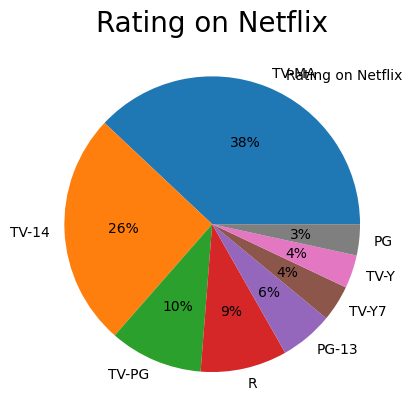

In [38]:
plt.pie(ratings['count'][:8], labels=ratings['rating'][:8],autopct='%.0f%%')
plt.title("Rating on Netflix",fontsize=20)
plt.text(0.5,0.98, 'Rating on Netflix')